## WiP D213 Task 2: NLP Deep Learning

### Non-narrative steps

 #### 1. Select dataset
 #### 2. Data EDA/Preprocessing
        - Detection and handling of unusual characters (i.e., emojis and non-English characters)
        - Determine vocabulary size
        - Select word embedding length based on statistical inference
 #### 3. `Tokenization`/normalization
 #### 4. `Padding` (standardize `length of sequences`)
        - Pad as prefix or suffix
        - Pull out at least one example of padded sequence for observation
 #### 5. Determine number of `categories of sentiment` to use and `activation function` to use (specifically in the final Dense layer?)
 #### 6. Determine `train/test split` (<font size=2em>*model.fit(validation_set=`x`)*</font>)
 #### 7. Design the model in `TensorFlow`
        - Number of layers
        - Type of layers
        - Total number of parameters
 #### 8. Choice of `hyperparameters` including:
        - Activation function (see 5.)
              - 'relu'
        - Number of nodes per layer
              - TBD
        - Loss function
              - Probably 'categorical_crossentropy', but backup with reference to the literature
        - Optimizer
              - Probably 'adam', but same as above
        - EarlyStopping criteria
              - Maybe 2? Experiment and decide
        - Evaluation metric
              - MSE or RMSE
 #### 9. `Evaluate` the model
        - Find out how changing EarlyStopping(x) impacts the model vs number of training epochs
        - Make a line graph of the model training both loss metric and validation metric (i.e., MSE)
        - Determine model fitness vs overfitting
        - Quantify accuracy of the model

In [1]:
# Suppress Tensorflow warnings
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

# Imports
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_datasets as tfds

# Initial checks
print(f'''
         TF ver: {tf.__version__}
     TF-hub ver: {hub.__version__}
Eager Execution: {tf.executing_eagerly()}
            GPU: {"available" if tf.config.list_physical_devices("GPU") else "not available"}
''')



         TF ver: 2.12.0
     TF-hub ver: 0.13.0
Eager Execution: True
            GPU: available



In [2]:
# Begin modeling
import numpy as np
import pandas as pd

# Train/test split
train_data, validation_data, test_data = tfds.load(
    name='imdb_reviews',
    split=('train[:60%]', 'train[60%:]', 'test'),
    as_supervised=True)

In [3]:
train_examples_batch, train_labels_batch = next(iter(train_data.batch(10)))

train_examples_batch

<tf.Tensor: shape=(10,), dtype=string, numpy=
array([b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.",
       b'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell 

In [4]:
embedding = "https://tfhub.dev/google/nnlm-en-dim50/2"
hub_layer = hub.KerasLayer(embedding, input_shape=[], dtype=tf.string, trainable=True)

hub_layer(train_examples_batch[:3])

<tf.Tensor: shape=(3, 50), dtype=float32, numpy=
array([[ 0.5423194 , -0.01190171,  0.06337537,  0.0686297 , -0.16776839,
        -0.10581177,  0.168653  , -0.04998823, -0.31148052,  0.07910344,
         0.15442258,  0.01488661,  0.03930155,  0.19772716, -0.12215477,
        -0.04120982, -0.27041087, -0.21922147,  0.26517656, -0.80739075,
         0.25833526, -0.31004202,  0.2868321 ,  0.19433866, -0.29036498,
         0.0386285 , -0.78444123, -0.04793238,  0.41102988, -0.36388886,
        -0.58034706,  0.30269453,  0.36308962, -0.15227163, -0.4439151 ,
         0.19462997,  0.19528405,  0.05666233,  0.2890704 , -0.28468323,
        -0.00531206,  0.0571938 , -0.3201319 , -0.04418665, -0.08550781,
        -0.55847436, -0.2333639 , -0.20782956, -0.03543065, -0.17533456],
       [ 0.56338924, -0.12339553, -0.10862677,  0.7753425 , -0.07667087,
        -0.15752274,  0.01872334, -0.08169781, -0.3521876 ,  0.46373403,
        -0.08492758,  0.07166861, -0.00670818,  0.12686071, -0.19326551,
 

In [5]:
model = tf.keras.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(1))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 50)                48190600  
                                                                 
 dense (Dense)               (None, 16)                816       
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 48,191,433
Trainable params: 48,191,433
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), metrics=['accuracy'])

In [7]:
history = model.fit(train_data.shuffle(10000).batch(512), epochs=10, validation_data=validation_data.batch(512), verbose=1)

Epoch 1/10


30/30 [==============================] - 6s 167ms/step - loss: 0.6622 - accuracy: 0.5179 - val_loss: 0.6160 - val_accuracy: 0.5640
Epoch 2/10
30/30 [==============================] - 5s 162ms/step - loss: 0.5529 - accuracy: 0.6753 - val_loss: 0.5052 - val_accuracy: 0.7365
Epoch 3/10
30/30 [==============================] - 5s 159ms/step - loss: 0.4163 - accuracy: 0.8099 - val_loss: 0.4068 - val_accuracy: 0.8275
Epoch 4/10
30/30 [==============================] - 5s 164ms/step - loss: 0.3030 - accuracy: 0.8824 - val_loss: 0.3496 - val_accuracy: 0.8381
Epoch 5/10
30/30 [==============================] - 5s 146ms/step - loss: 0.2252 - accuracy: 0.9161 - val_loss: 0.3207 - val_accuracy: 0.8605
Epoch 6/10
30/30 [==============================] - 4s 138ms/step - loss: 0.1686 - accuracy: 0.9464 - val_loss: 0.3076 - val_accuracy: 0.8676
Epoch 7/10
30/30 [==============================] - 5s 159ms/step - loss: 0.1264 - accuracy: 0.9635 - val_loss: 0.3053 - val_accuracy: 0.8718
Epoch 8/10
30/30 

In [8]:
results = model.evaluate(test_data.batch(512), verbose=2)

for name, value in zip(model.metrics_names, results):
    print("%s: %.3f" % (name, value))

49/49 - 1s - loss: 0.3754 - accuracy: 0.8513 - 921ms/epoch - 19ms/step
loss: 0.375
accuracy: 0.851


In [9]:
# Load in IMDB dataset
df = pd.read_csv('./data/imdb_labelled.txt', sep='\t+', header=None, names=['review', 'sentiment'], engine='python')
df

,review,sentiment
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1
...,...,...
995,I just got bored watching Jessice Lange take h...,0
996,"Unfortunately, any virtue in this film's produ...",0
997,"In a word, it is embarrassing.",0
998,Exceptionally bad!,0


Text(0, 0.5, 'Frequency')

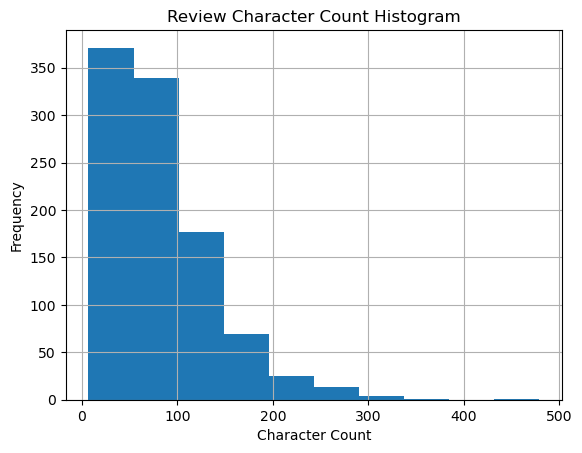

In [10]:
char_hist = df['review'].str.len().hist()
char_hist.set_title('Review Character Count Histogram')
char_hist.set_xlabel('Character Count')
char_hist.set_ylabel('Frequency')

Try embedding techniques

In [11]:
# Try BERT
feature = df.review.to_numpy()
target = df.sentiment.to_numpy()
tfdata = tf.data.Dataset.from_tensor_slices((feature, target))
next(iter(tfdata.batch(10)))

(<tf.Tensor: shape=(10,), dtype=string, numpy=
 array([b'A very, very, very slow-moving, aimless movie about a distressed, drifting young man.  ',
        b'Not sure who was more lost - the flat characters or the audience, nearly half of whom walked out.  ',
        b'Attempting artiness with black & white and clever camera angles, the movie disappointed - became even more ridiculous - as the acting was poor and the plot and lines almost non-existent.  ',
        b'Very little music or anything to speak of.  ',
        b'The best scene in the movie was when Gerardo is trying to find a song that keeps running through his head.  ',
        b"The rest of the movie lacks art, charm, meaning... If it's about emptiness, it works I guess because it's empty.  ",
        b'Wasted two hours.  ',
        b'Saw the movie today and thought it was a good effort, good messages for kids.  ',
        b'A bit predictable.  ',
        b'Loved the casting of Jimmy Buffet as the science teacher.  '],
     

In [12]:
tf_vocab = tf.data.Dataset.from_tensor_slices(feature)

from tensorflow_text.tools.wordpiece_vocab import bert_vocab_from_dataset as bert_vocab

bert_tokenizer_params=dict(lower_case=True)
reserved_tokens=["[PAD]", "[UNK]", "[START]", "[END]"]

bert_vocab_args = dict(
    vocab_size = 8000,
    reserved_tokens=reserved_tokens,
    bert_tokenizer_params=bert_tokenizer_params,
    learn_params={})

vocab_out = bert_vocab.bert_vocab_from_dataset(tf_vocab, **bert_vocab_args)



In [13]:
# np.random.randint(0, vocab_out.__len__(), 10)
for i in range(5):
    rands = np.random.randint(0, vocab_out.__len__(), 10)
    vocab_rand_list = [vocab_out[i] for i in rands]
    print(vocab_rand_list)


['short', '##y', '##ack', '##ds', 'r', '##)', '##al', '##ever', 'screen', '##oy']
['##(', 'of', 'my', '##ance', '##ight', '##ating', 'simply', '##8', 'should', 'not']
['10', 'waste', '##ick', '-', '##ow', '##lievable', '##u', '##ting', 'camera', '[PAD]']
['##ory', '##ot', '##n', 'find', 'part', 'look', '##ure', '##est', '##ob', '9']
['##al', '##ine', '##ut', '##m', '##3', '##ow', '##en', '##?', 'big', '##!']


In [14]:
vocab_out.__len__()

483

In [15]:
with open('./data/vocab.txt', 'w') as f:
    for token in vocab_out:
        print(token, file=f)

In [16]:
import tensorflow_text as text

tokenizer = text.BertTokenizer(vocab_lookup_table='./data/vocab.txt', **bert_tokenizer_params)

In [17]:
tokenizer.tokenize(feature)

<tf.RaggedTensor [[[31], [91], [14], [91], [14], [91], [49, 295], [15], [43, 112, 176], [14],
  [31, 412, 240], [68], [104], [31], [34, 413, 222, 125, 72], [14],
  [34, 103, 159, 289, 211], [83, 75, 158], [327], [16]]                     ,
 [[87], [49, 174], [126], [67], [144], [42, 242], [15], [57],
  [36, 114, 272], [136], [122], [57], [31, 481, 76, 291], [14],
  [44, 376, 73], [38, 98, 289], [60], [126, 92], [53, 98, 120, 72], [119],
  [16]]                                                                   ,
 [[101, 78, 74, 92, 168, 211], [325, 187, 125], [82], [431], [8],
  [53, 99, 188], [58], [33, 107, 389], [433], [100, 158, 274], [14], [57],
  [68], [34, 159, 59, 237, 168, 112, 293, 190], [15], [102, 478, 155],
  [124], [144], [48, 220, 109, 481, 114, 256], [15], [79], [57], [115],
  [67], [46, 112, 210], [58], [57], [156], [58], [362, 59],
  [31, 114, 92, 242], [145, 75], [15], [35, 257, 413, 196], [16]]         ,
 [[91], [259], [304], [122], [212, 353], [64], [49, 168, 74, 95

In [18]:
text.pad_model_inputs(tokenizer.tokenize(feature), 250)

(<tf.Tensor: shape=(1000, 250), dtype=int64, numpy=
 array([[ 31,  91,  14, ...,   0,   0,   0],
        [ 87,  49, 174, ...,   0,   0,   0],
        [101,  78,  74, ...,   0,   0,   0],
        ...,
        [ 66,  31,  53, ...,   0,   0,   0],
        [ 35, 257, 251, ...,   0,   0,   0],
        [ 90,  66,  90, ...,   0,   0,   0]])>,
 <tf.Tensor: shape=(1000, 250), dtype=int64, numpy=
 array([[1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        ...,
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0]])>)

In [29]:
# Try lower-level Tokenizer API instead

# Load in IMDB dataset
df = pd.read_csv('./data/imdb_labelled.txt', sep='\t+', header=None, names=['review', 'sentiment'], engine='python')
df

,review,sentiment
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1
...,...,...
995,I just got bored watching Jessice Lange take h...,0
996,"Unfortunately, any virtue in this film's produ...",0
997,"In a word, it is embarrassing.",0
998,Exceptionally bad!,0


In [30]:
hparams = {
    "batch_size": 128,
    "cnn_filter_sizes": [128, 128, 128],
    "cnn_kernel_sizes": [5, 5, 5],
    "cnn_pooling_sizes": [5, 5, 40],
    "constraint_learning_rate": 0.01,
    "embedding_dim": 100,
    "embedding_trainable": False,
    "learning_rate": 0.005,
    "max_num_words": 10000,
    "max_sequence_length": 250
}

In [31]:
# Create a function to split data into train, validation, and test sets
def train_val_test_split(X, y, val_size=0.15, test_size=0.15, rand_seed=42):
    """
    Splits data into train, validation, and test sets.
    
    Args:
        X (pd.Series): Series of features
        y (pd.Series): Series of labels
        val_size (float): Proportion of data to use for validation set
        test_size (float): Proportion of data to use for test set
        rand_seed (int): Random seed for reproducibility
    
    Returns:
        Six pd.Series objects: X_train, X_val, X_test, y_train, y_val, y_test corresponding to
        the train, validation, and test sets for the features and labels respectively.
    """
    df = pd.DataFrame({X.name: X, y.name: y})
    
    val_int = int(val_size*len(df))
    test_int = int(test_size*len(df))
    
    train_split = len(df) - val_int - test_int
    val_split = len(df) - test_int
    
    shuf = df.sample(frac=1, random_state=rand_seed) # Shuffle rows
    
    X_train = shuf.iloc[:train_split][X.name]
    X_val = shuf.iloc[train_split:val_split][X.name]
    X_test = shuf.iloc[val_split:][X.name]
    y_train = shuf.iloc[:train_split][y.name]
    y_val = shuf.iloc[train_split:val_split][y.name]
    y_test = shuf.iloc[val_split:][y.name]
    
    return X_train, X_val, X_test, y_train, y_val, y_test

X_train, X_val, X_test, y_train, y_val, y_test = train_val_test_split(df.review, df.sentiment)

In [32]:
from tensorflow.keras.preprocessing import text

tokenizer = text.Tokenizer(num_words=hparams['max_num_words'])
tokenizer.fit_on_texts(X_train)

In [33]:
X_train[:3].values

array(["Watching washing machine twirling around wouldn't hurt your eyes as much as this show.  ",
       'The movie has almost no action scenes in it and very little comedy.  ',
       'I just saw this film and I recommend it.  '], dtype=object)

In [34]:
tokenizer.texts_to_sequences(X_train)[:3]

[[100, 895, 540, 896, 541, 542, 897, 67, 543, 18, 88, 18, 7, 101],
 [1, 11, 51, 289, 61, 290, 94, 10, 8, 2, 28, 120, 218],
 [6, 26, 166, 7, 14, 2, 6, 121, 8]]

In [35]:
tokenizer.sequences_to_texts(tokenizer.texts_to_sequences(X_train))[:3]

["watching washing machine twirling around wouldn't hurt your eyes as much as this show",
 'the movie has almost no action scenes in it and very little comedy',
 'i just saw this film and i recommend it']

In [36]:
from tensorflow.keras.utils import pad_sequences

pad_sequences(tokenizer.texts_to_sequences(X_train)[:3], maxlen=hparams['max_sequence_length'])

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0

In [37]:
from tensorflow.keras.layers import TextVectorization

vocab_size = 10000
sequence_length = 250

vectorizer = TextVectorization(standardize='lower_and_strip_punctuation', split='whitespace', max_tokens=vocab_size, output_sequence_length=sequence_length)

vectorizer.adapt(X_train.values)

In [38]:
from tensorflow.keras.layers import Embedding, Dense, GlobalAveragePooling1D
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(vectorizer)
model.add(Embedding(vocab_size, 100))
model.add(Dense(128, activation='relu'))
model.add(Dense(1))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, 250)              0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 250, 100)          1000000   
                                                                 
 dense_2 (Dense)             (None, 250, 128)          12928     
                                                                 
 dense_3 (Dense)             (None, 250, 1)            129       
                                                                 
Total params: 1,013,057
Trainable params: 1,013,057
Non-trainable params: 0
_________________________________________________________________


In [39]:
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=128)

Epoch 1/10
6/6 [==============================] - 2s 178ms/step - loss: 2.9959 - accuracy: 0.4986 - val_loss: 1.3068 - val_accuracy: 0.4933
Epoch 2/10
6/6 [==============================] - 1s 128ms/step - loss: 1.1758 - accuracy: 0.4986 - val_loss: 1.0235 - val_accuracy: 0.4933
Epoch 3/10
6/6 [==============================] - 1s 131ms/step - loss: 0.9607 - accuracy: 0.4986 - val_loss: 0.8967 - val_accuracy: 0.4933
Epoch 4/10
6/6 [==============================] - 1s 161ms/step - loss: 0.8560 - accuracy: 0.4986 - val_loss: 0.8219 - val_accuracy: 0.4933
Epoch 5/10
6/6 [==============================] - 1s 154ms/step - loss: 0.7962 - accuracy: 0.4986 - val_loss: 0.7728 - val_accuracy: 0.4933
Epoch 6/10
6/6 [==============================] - 1s 128ms/step - loss: 0.7543 - accuracy: 0.4986 - val_loss: 0.7423 - val_accuracy: 0.4933
Epoch 7/10
6/6 [==============================] - 1s 146ms/step - loss: 0.7270 - accuracy: 0.4986 - val_loss: 0.7244 - val_accuracy: 0.4933
Epoch 8/10
6/6 [====

In [150]:
embedding_dim = 16
text_embedding = Embedding(vocab_size, embedding_dim, name='text_embedding')
text_input = Sequential([vectorizer, text_embedding], name='text_input')
classifier = Sequential([Dense(16, activation='relu')], name='classifier')
model = Sequential([text_input, classifier], name='model')
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_input (Sequential)     (None, 250, 16)           160000    
                                                                 
 classifier (Sequential)     (None, 250, 16)           272       
                                                                 
Total params: 160,272
Trainable params: 160,272
Non-trainable params: 0
_________________________________________________________________


In [139]:
X_train = tf.data.Dataset.from_tensor_slices((X_train.to_numpy(), ))
y_train = tf.data.Dataset.from_tensor_slices((y_train.to_numpy(), ))
X_val = tf.data.Dataset.from_tensor_slices((X_val.to_numpy(), ))
y_val = tf.data.Dataset.from_tensor_slices((y_val.to_numpy(), ))

In [142]:
train = tf.data.Dataset.zip((X_train, y_train))

In [151]:
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=128)

Epoch 1/10


ValueError: in user code:

    File "/home/jtrawick/anaconda3/envs/tf2/lib/python3.9/site-packages/keras/engine/training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "/home/jtrawick/anaconda3/envs/tf2/lib/python3.9/site-packages/keras/engine/training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/jtrawick/anaconda3/envs/tf2/lib/python3.9/site-packages/keras/engine/training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "/home/jtrawick/anaconda3/envs/tf2/lib/python3.9/site-packages/keras/engine/training.py", line 1051, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/home/jtrawick/anaconda3/envs/tf2/lib/python3.9/site-packages/keras/engine/training.py", line 1109, in compute_loss
        return self.compiled_loss(
    File "/home/jtrawick/anaconda3/envs/tf2/lib/python3.9/site-packages/keras/engine/compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/home/jtrawick/anaconda3/envs/tf2/lib/python3.9/site-packages/keras/losses.py", line 142, in __call__
        losses = call_fn(y_true, y_pred)
    File "/home/jtrawick/anaconda3/envs/tf2/lib/python3.9/site-packages/keras/losses.py", line 268, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/home/jtrawick/anaconda3/envs/tf2/lib/python3.9/site-packages/keras/losses.py", line 1984, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "/home/jtrawick/anaconda3/envs/tf2/lib/python3.9/site-packages/keras/backend.py", line 5559, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 1) and (None, 250, 16) are incompatible


In [ ]:
tf_vocab = tf.data.Dataset.from_tensor_slices(feature)

from tensorflow_text.tools.wordpiece_vocab import bert_vocab_from_dataset as bert_vocab

bert_tokenizer_params=dict(lower_case=True)
reserved_tokens=["[PAD]", "[UNK]", "[START]", "[END]"]

bert_vocab_args = dict(
    vocab_size = 8000,
    reserved_tokens=reserved_tokens,
    bert_tokenizer_params=bert_tokenizer_params,
    learn_params={})

vocab_out = bert_vocab.bert_vocab_from_dataset(tf_vocab.batch(100).prefetch(3), **bert_vocab_args)



In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     1000 non-null   object
 1   sentiment  1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [11]:
df.describe(include='all')

,review,sentiment
count,1000,1000.00000
unique,997,NaN
top,10/10,NaN
freq,2,NaN
mean,NaN,0.50000
std,NaN,0.50025
min,NaN,0.00000
25%,NaN,0.00000
50%,NaN,0.50000
75%,NaN,1.00000


In [13]:
for i in df.review[:20]:
    print(i)

A very, very, very slow-moving, aimless movie about a distressed, drifting young man.  
Not sure who was more lost - the flat characters or the audience, nearly half of whom walked out.  
Attempting artiness with black & white and clever camera angles, the movie disappointed - became even more ridiculous - as the acting was poor and the plot and lines almost non-existent.  
Very little music or anything to speak of.  
The best scene in the movie was when Gerardo is trying to find a song that keeps running through his head.  
The rest of the movie lacks art, charm, meaning... If it's about emptiness, it works I guess because it's empty.  
Wasted two hours.  
Saw the movie today and thought it was a good effort, good messages for kids.  
A bit predictable.  
Loved the casting of Jimmy Buffet as the science teacher.  
And those baby owls were adorable.  
The movie showed a lot of Florida at it's best, made it look very appealing.  
The Songs Were The Best And The Muppets Were So Hilarious

In [14]:
df.review[5]


"The rest of the movie lacks art, charm, meaning... If it's about emptiness, it works I guess because it's empty.  "

In [15]:
import re

re.sub(r'[^\w\s]', '', df.review[5]).lower().strip()

'the rest of the movie lacks art charm meaning if its about emptiness it works i guess because its empty'

In [16]:
clean_df = df.copy()
clean_df.review = clean_df.review.str.replace(r'[^\w\s]', '', regex=True).str.lower().str.strip()
clean_df
# df.review.str.replace(r'[^\w\s]', '', regex=True).str.lower().str.strip()

,review,sentiment
0,a very very very slowmoving aimless movie abou...,0
1,not sure who was more lost the flat character...,0
2,attempting artiness with black white and clev...,0
3,very little music or anything to speak of,0
4,the best scene in the movie was when gerardo i...,1
...,...,...
995,i just got bored watching jessice lange take h...,0
996,unfortunately any virtue in this films product...,0
997,in a word it is embarrassing,0
998,exceptionally bad,0


In [17]:
clean_df.review[5]

'the rest of the movie lacks art charm meaning if its about emptiness it works i guess because its empty'

In [20]:
import string
string.ascii_lowercase

'abcdefghijklmnopqrstuvwxyz'

In [40]:
clean_df[clean_df.review.str.contains(r'[0-9]')]

,review,sentiment
40,the very idea of it was lame take a minor cha...,0
53,on the negative its insipid enough to cause re...,0
61,all in all i give this one a resounding 9 out ...,1
74,i wouldnt say theyre worth 2 hours of your tim...,0
81,this if the first movie ive given a 10 to in y...,1
...,...,...
893,the puppets look really cheesy not in a good ...,0
908,this is one of the worst sandra bullock movie ...,0
930,i rate this movie 910,1
973,this one wants to surf on the small wave of sp...,0


In [32]:
clean_df.review[162]

'awful'

In [ ]:
str().isalpha()

In [ ]:
tf.convert_to_tensor(df.review)

<tf.Tensor: shape=(748,), dtype=string, numpy=
array([b'A very, very, very slow-moving, aimless movie about a distressed, drifting young man.  ',
       b'Not sure who was more lost - the flat characters or the audience, nearly half of whom walked out.  ',
       b'Attempting artiness with black & white and clever camera angles, the movie disappointed - became even more ridiculous - as the acting was poor and the plot and lines almost non-existent.  ',
       b'Very little music or anything to speak of.  ',
       b'The best scene in the movie was when Gerardo is trying to find a song that keeps running through his head.  ',
       b"The rest of the movie lacks art, charm, meaning... If it's about emptiness, it works I guess because it's empty.  ",
       b'Wasted two hours.  ',
       b'Saw the movie today and thought it was a good effort, good messages for kids.  ',
       b'A bit predictable.  ',
       b'Loved the casting of Jimmy Buffet as the science teacher.  ',
       b'And tho